# Итоговая работа

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Импорт библиотек
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.4 MB/s eta 0:00:00


In [3]:
# Подключаемся к файлу
hr = pd.read_csv('/content/drive/MyDrive/Python/04_Дз_Задания/04_Итоговый блок/HR.csv', sep=',')

## 1. Загрузка файла в pandas dataframe

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Расчет основных статистик

Расчет среднего, стандартного отклонения, минимального, максимального значения для количественных данных

In [6]:
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [7]:
# расчет квартилей
iqr = (
    hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].quantile(q=0.75)
    - hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].quantile(q=0.25)
)
lower_bound = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].quantile(q=0.25) - 1.5*iqr
upper_bound = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].quantile(q=0.75) + 1.5*iqr

In [8]:
# Поиск выбросов satisfaction_level
hr_sl = hr[hr['satisfaction_level'].between(lower_bound['satisfaction_level'], upper_bound['satisfaction_level'], inclusive='both')]
hr_sl['satisfaction_level']

,satisfaction_level
0,0.38
1,0.80
2,0.11
3,0.72
4,0.37
...,...
14994,0.40
14995,0.37
14996,0.37
14997,0.11


In [9]:
# Поиск выбросов last_evaluation
hr_le = hr[hr['last_evaluation'].between(lower_bound['last_evaluation'], upper_bound['last_evaluation'], inclusive='both')]
hr_le['last_evaluation']

,last_evaluation
0,0.53
1,0.86
2,0.88
3,0.87
4,0.52
...,...
14994,0.57
14995,0.48
14996,0.53
14997,0.96


In [10]:
# Поиск выбросов number_project
hr_np = hr[hr['number_project'].between(lower_bound['number_project'], upper_bound['number_project'], inclusive='both')]
hr_np['number_project']

,number_project
0,2
1,5
2,7
3,5
4,2
...,...
14994,2
14995,2
14996,2
14997,6


In [11]:
# Поиск выбросов average_montly_hours
hr_amh = hr[hr['average_montly_hours'].between(lower_bound['average_montly_hours'], upper_bound['average_montly_hours'], inclusive='both')]
hr_amh['average_montly_hours']

,average_montly_hours
0,157
1,262
2,272
3,223
4,159
...,...
14994,151
14995,160
14996,143
14997,280


In [12]:
# Поиск выбросов time_spend_company
hr_tsc = hr[hr['time_spend_company'].between(lower_bound['time_spend_company'], upper_bound['time_spend_company'], inclusive='both')]
hr_tsc['time_spend_company']

,time_spend_company
0,3
2,4
3,5
4,3
5,3
...,...
14994,3
14995,3
14996,3
14997,4


Для категориальных данных имеет смысл рассчитать mode(), value_counts(), unique()

In [13]:
# Расчет value_counts
hr[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].value_counts()

Work_accident  left  promotion_last_5years  department  salary
0              0     0                      sales       medium    1161
                                                        low       1149
                                            technical   low        816
                                                        medium     694
               1     0                      sales       low        670
                                                                  ... 
1              0     1                      hr          low          1
                                            management  medium       1
                                            marketing   high         1
                                            sales       high         1
               1     1                      sales       medium       1
Name: count, Length: 158, dtype: int64

In [14]:
# Расчет mode
hr[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


In [15]:
# Расчет unique
wa = hr['Work_accident'].unique()
lft = hr['left'].unique()
pl5y = hr['promotion_last_5years'].unique()
dprt = hr['department'].unique()
slr = hr['salary'].unique()
print(f'wa:{wa},\nlft:{lft},\npl5y:{pl5y},\ndep:{dprt},\nslr:{slr}')

wa:[0 1],
lft:[1 0],
pl5y:[0 1],
dep:['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'],
slr:['low' 'medium' 'high']


## 3. Рассчитываем и визуализируем корреляционную матрицу для количественных переменных. Определяем две самые скоррелированные и две наименее скоррелированные переменные

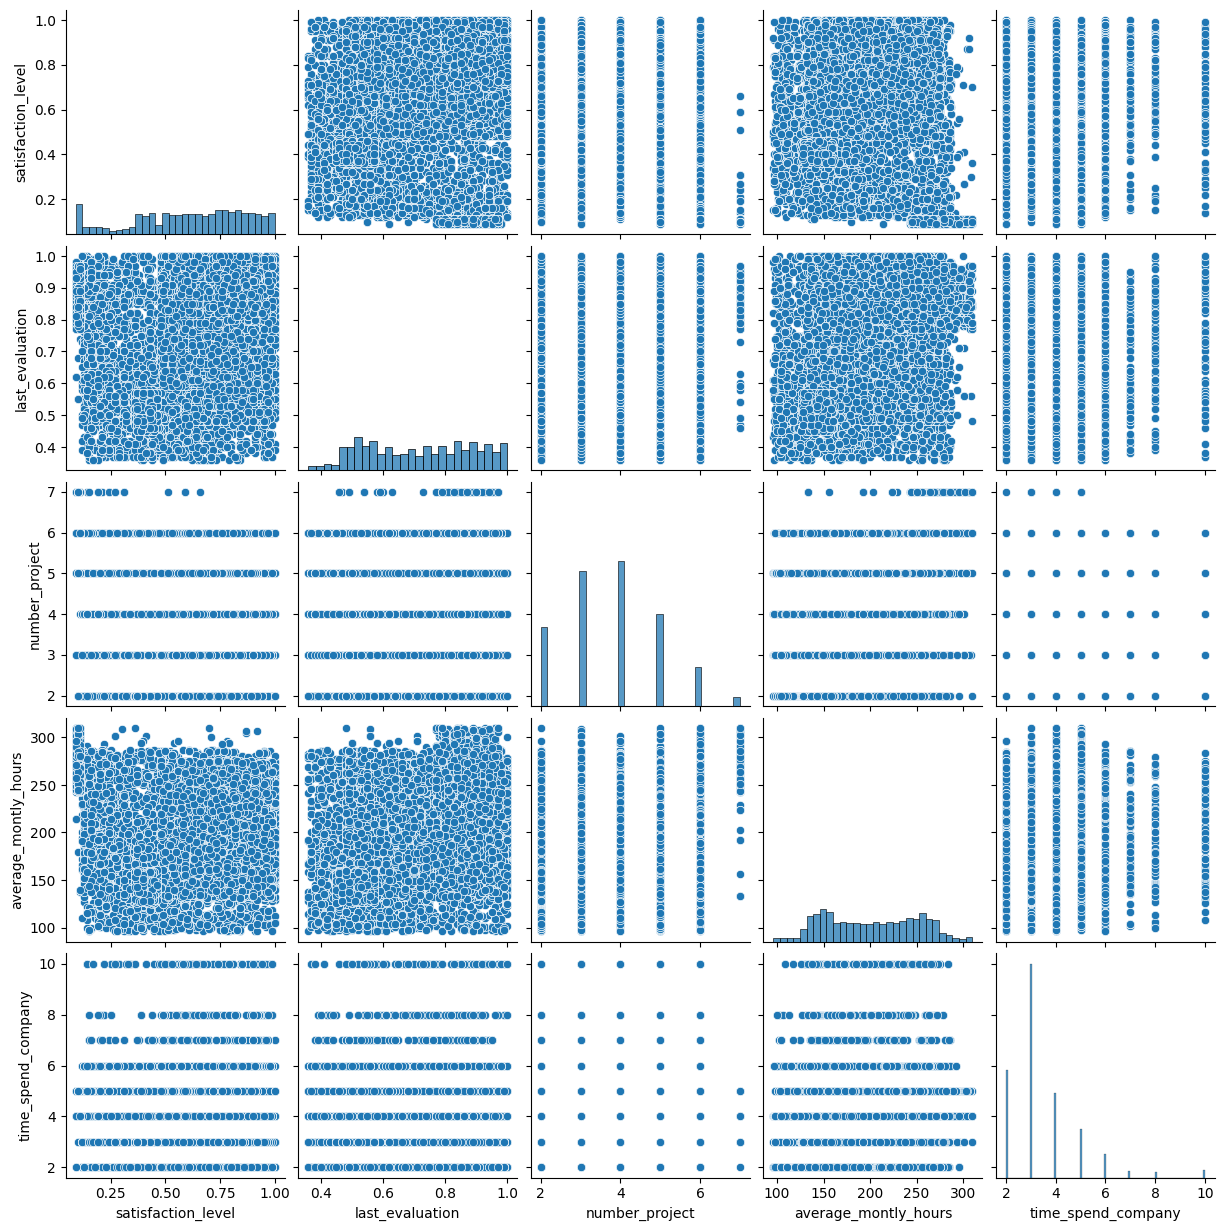

In [16]:
# Визуализируем зависимости для количественных переменных
sns.pairplot(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


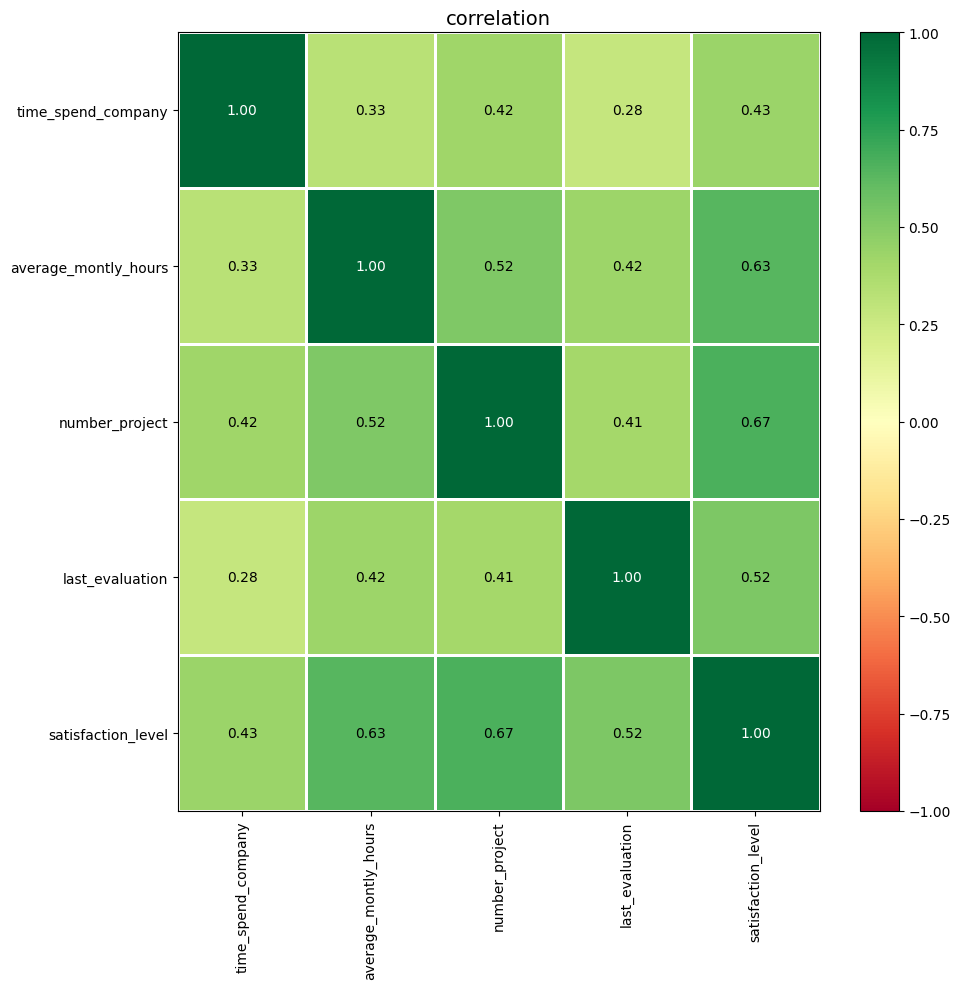

In [17]:
# Расчитываем коэффициенты  корреляции
hr_pm = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].phik_matrix()
plot_correlation_matrix(hr_pm.values, x_labels=hr_pm.columns, y_labels=hr_pm.index, figsize=(10, 10))

- Наиболее скоррелированные переменные - satisfaction_level и number_project
- Наименне скоррелированные переменные - last_evaluation и time_spend_company

## 4. Рассчитываем сколько сотрудников работает в каждом департаменте

In [18]:
# Т.к. в данных нет пустых строк, можем использовать, например, столбец 'salary'
hr_c = hr[['department','salary']].groupby(['department']).count()
hr_c = hr_c.sort_values(by=['salary'], ascending=False).reset_index()
hr_c.columns =['Департамент', 'Кол-во сотрудников в департаменте']
hr_c

,Департамент,Кол-во сотрудников в департаменте
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


## 5. Показываем распределение сотрудников по зарплатам

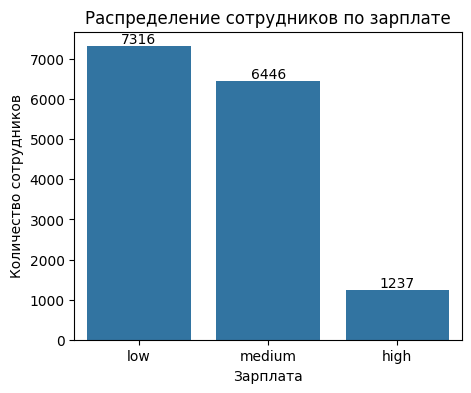

In [19]:
hr_s = hr[['department','salary']].groupby(['salary']).count().reset_index().sort_values(by=['department'], ascending=False)

plt.figure(figsize=[5, 4])
my_chart_5 = sns.barplot(data=hr_s, x='salary', y='department',  errorbar=None)
plt.title('Распределение сотрудников по зарплате')
plt.ylabel('Количество сотрудников')
plt.xlabel('Зарплата')
my_chart_5.bar_label(my_chart_5.containers[0], fontsize=10)
plt.show()

## 6. Показываем распределение сотрудников по зарплатам в каждом департаменте по отдельности

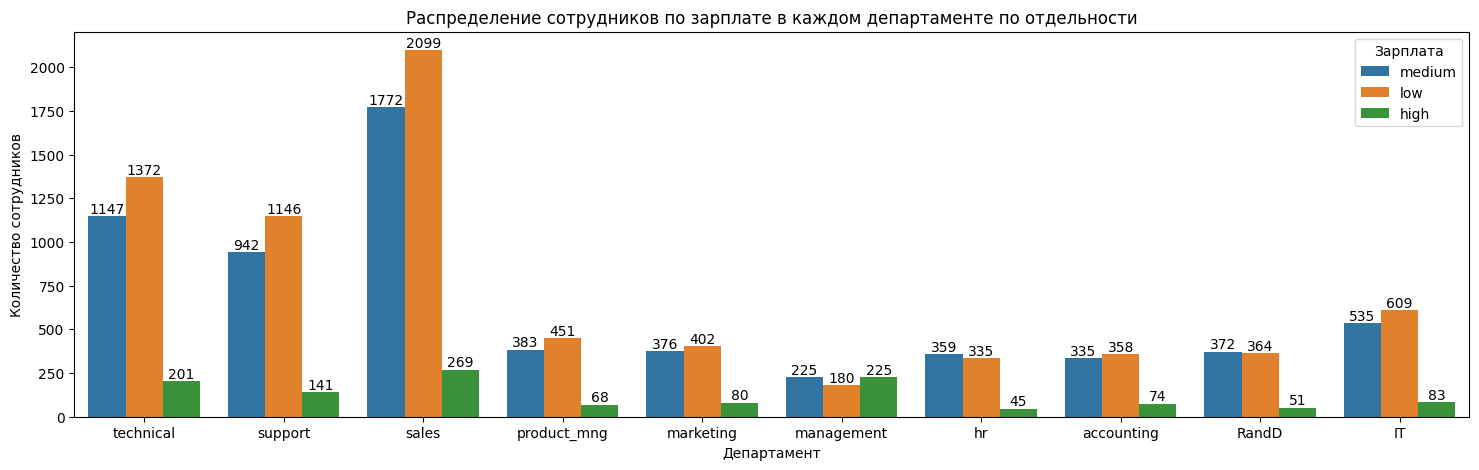

In [20]:
hr_d_s = hr[['department','salary', 'left']].groupby(['department','salary']).count().reset_index().sort_values(by=['department'], ascending=False)
hr_d_s.columns =['Департамент', 'Зарплата', 'Кол-во сотрудников в департаменте']

plt.figure(figsize=[18, 5])
my_chart = sns.barplot(data=hr_d_s, x='Департамент', y='Кол-во сотрудников в департаменте', hue='Зарплата', errorbar=None)
plt.title('Распределение сотрудников по зарплате в каждом департаменте по отдельности')
plt.ylabel('Количество сотрудников')
plt.xlabel('Департамент')

for i in my_chart.containers:
 my_chart.bar_label(i, fontsize=10)

## 7. Проверяем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [21]:
# Делаем два набора данных
hr_low_s = hr[hr['salary'] == 'low']
hs_high_s = hr[hr['salary'] == 'high']

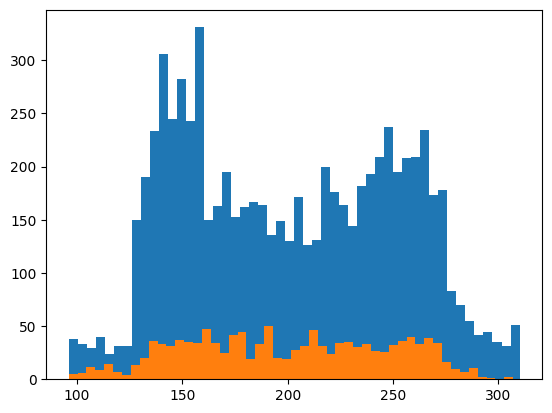

In [22]:
# Смотрим на распределения визуально
plt.hist(hr_low_s['average_montly_hours'], bins = 50);
plt.hist(hs_high_s['average_montly_hours'], bins = 50);

In [23]:
high_s = hs_high_s['average_montly_hours']
low_s = hr_low_s['average_montly_hours']

In [24]:
# Проверяем нормальность распределения для high_s
stat, p = st.shapiro(high_s)

print(f'stat = {stat:.3f}, p = {p}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.971, p = 5.6027314672963646e-15
Вероятно не нормальное распределение


In [26]:
# Проверяем нормальность распределения для low_s
stat, p = st.shapiro(low_s)

print(f'stat = {stat:.3f}, p = {p}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.960, p = 6.987004491004302e-41
Вероятно не нормальное распределение


In [27]:
# Т.к. распределения ненормальные, будем использовать критерий Манна-Уитни
stat, p = st.mannwhitneyu(high_s, low_s)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, время, которое проводят на работе сотрудники с высоким и низким окладом, вероятно, одинаковое')
else:
    print('Отклоняем нулевую гипотезу, время, которое проводят на работе сотрудники с высоким и низким окладом, вероятно, различается')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, время, которое проводят на работе сотрудники с высоким и низким окладом, вероятно, одинаковое


## 8. Рассчитываем следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [82]:
# Расчет Средней степени удовлетворенности и Среднего количества проектов
hr_8 = hr.groupby('left').agg({'satisfaction_level' : ['mean'], 'number_project' : ['mean']}).reset_index()
hr_8.columns =['Уволился ли сотрудник', 'Средний уровень удовлетворенности', 'Среднее кол-во проектов']
hr_8

,Уволился ли сотрудник,Средний уровень удовлетворенности,Среднее кол-во проектов
0,0,0.666810,3.786664
1,1,0.440098,3.855503


In [83]:
# Расчет Доли сотрудников с повышением за последние 5 лет
hr_10 = hr.groupby('left').sum('promotion_last_5years') / hr.groupby('left').count()
hr_10 = hr_10.reset_index()
hr_10 = hr_10[['left', 'promotion_last_5years']]
hr_10.columns =['Уволился ли сотрудник', 'Доля сотрудников с повышением за последние 5 лет']
hr_10

,Уволился ли сотрудник,Доля сотрудников с повышением за последние 5 лет
0,0,0.026251
1,1,0.005321
